# Movie Budget vs Gross Revenue Analysis

In this project, we explore the relationship between movie budget and gross revenue using correlation analysis and a simple linear regression model.
We will load the dataset, clean it, and perform some visualizations to better understand the data.

# Dataset Overview

For this analysis, we will be working with a dataset containing information about various movies scraped from IMDb. The dataset includes the following columns:

- **name**: The name of the movie
- **rating**: rating of the movie (R, PG-13, etc.)
- **genre**: main genre of the film
- **year**: release year
- **released**: release date
- **score**: IMDb score
- **votes**: count of IMDb user votes
- **director**: the director of the film
- **writer**: the writer of the film
- **star**: the main actor/actress of the film
- **country**: country of origin
- **budget**: The production budget of the movie
- **gross**: The total revenue generated by the movie
- **company**: the company that produced the film
- **runtime**: duration of the movie


This dataset is sourced from Kaggle: https://www.kaggle.com/datasets/danielgrijalvas/movies/data.

# Data Loading and Exploration

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust the configuration of the plots we will create


In [ ]:
# Load the dataset
df = pd.read_csv(r'/Users/Joanna/Downloads/movies.csv')

In [ ]:
# Preview the first 5 rows of the dataset to understand its structure
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning

Before analyzing the data, we need to check for missing values, convert data types where needed, and fix any inconsistencies.

In [ ]:
# Check for missing data
# We calculate the percentage of missing values in each column to decide how to handle them.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


Since the percentage of missing values is low, we will drop rows with missing data.

In [ ]:
# Drop rows with missing values 
df = df.dropna()

In [ ]:
# Confirm Missing Data Has Been Removed

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [ ]:
# Check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

The 'budget' and 'gross' columns will be more useful to us in a numeric data type

In [ ]:
# Convert the 'budget' and 'gross' columns to numeric values

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [ ]:
df

The dataset appears to have a missmatch between the release year column and the year displayed in the release date column

In [ ]:
# Create a corrected year released column to match the year in the released column

df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [ ]:
# Sort the dataframe by gross revenue descending
df = df.sort_values( by = ['gross'], inplace= False, ascending= False)

In [ ]:
# Drop any duplicates
df.drop_duplicates()

# Correlation Analysis

In this section, we'll explore how the numeric variables in our dataset relate to one another.

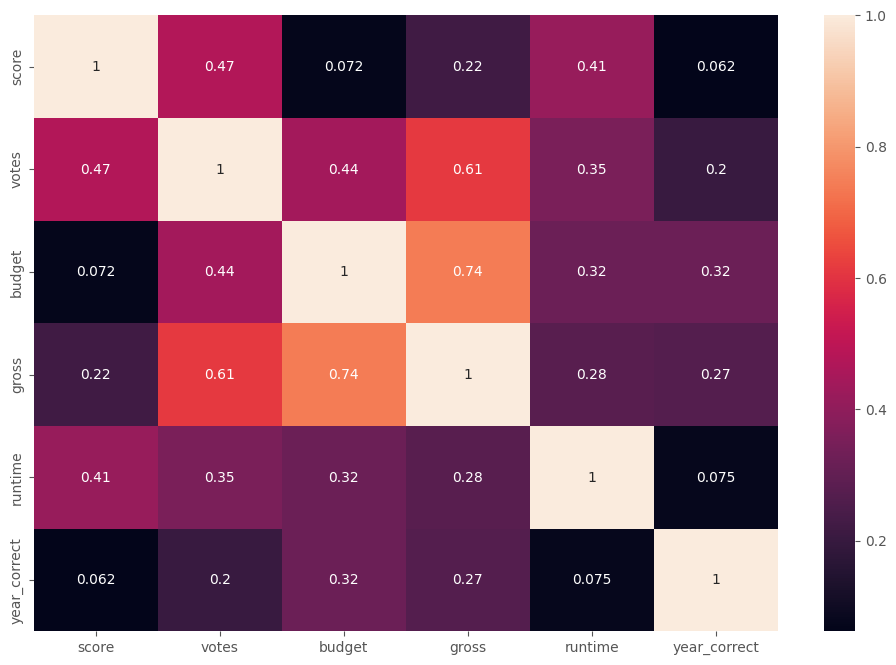

In [ ]:
# Calculate the correlation matrix to understand relationships between numeric variables
# Exclude the original incorrect year column

correlation_matrix = df.drop(columns= 'year').corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.show()

Based on the heatmap, we observe a strong positive correlation between 'budget' and 'gross' earnings. To visualize this relationship, we'll create a scatterplot.

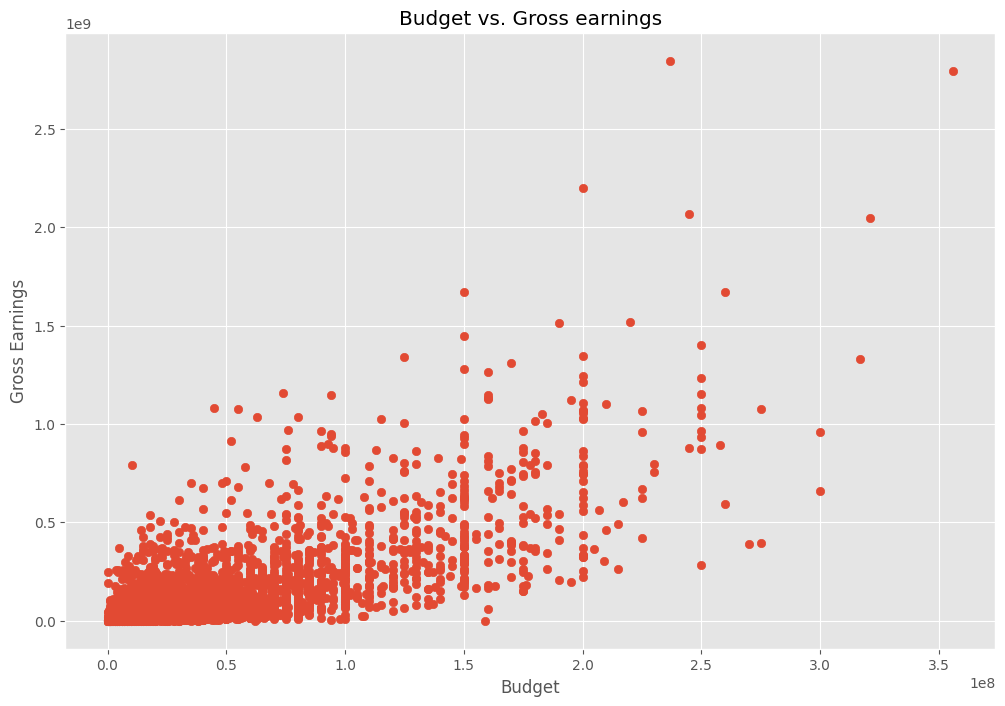

In [ ]:
# Plot Bugdet and Gross earnings

plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.title('Budget vs. Gross earnings')
plt.show()

# Simple Linear Regression

To further explore the relationship between movie 'budget' and 'gross' earnings, we'll perform a simple linear regression. This allows us to quantify how well 'budget' predicts 'gross' earnings.

- **Target variable**: 'gross' - The total revenue generated by the movie

- **Predictor variable**: 'budget' - The production budget of the movie


In [ ]:
# Importing necessary libraries for regression
from statsmodels.formula.api import ols

In [ ]:
# Define the data to be used for the regression model
ols_data = df[['budget', 'gross']]

# Fit the regression model
model = ols('gross ~ budget', data = ols_data).fit()

# Display the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     6569.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:44:59   Log-Likelihood:            -1.0880e+05
No. Observations:                5421   AIC:                         2.176e+05
Df Residuals:                    5419   BIC:                         2.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.686e+07   2.26e+06     -7.452      0.000   -2.13e+07   -1.24e+07
budget         3.3351      0.041     81.049      0.000       3.254       3.416
==============================================================================
Omnibus:                     4597.060   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304997.300
Skew:                           3.665   Prob(JB):                         0.00
Kurtosis:                      39.008   Cond. No.                     7.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpreting the Output:

From the regression results, we focus on the following key metrics:

- **Coefficient**: The budget coefficent was 3.3351. This means that for every additional $1 million added to a movie's budget, `gross` revenue is expected to  increase by $3.34 million on average.
- **P-value**: Our p-value of 0.000 (< 0.05) tells us the relationship between 'budget' and 'gross' revenue is statistically significant.
- **R-squared**: An R-squared value of 0.548 means that about 54.8% of the variation in 'gross' revenue can be explained by the variation in 'budget' alone. While this shows a moderate level of explanatory power, it also suggests that other factors not included in the model also influence revenue.



# Visualizing the regression line

<Axes: xlabel='budget', ylabel='gross'>

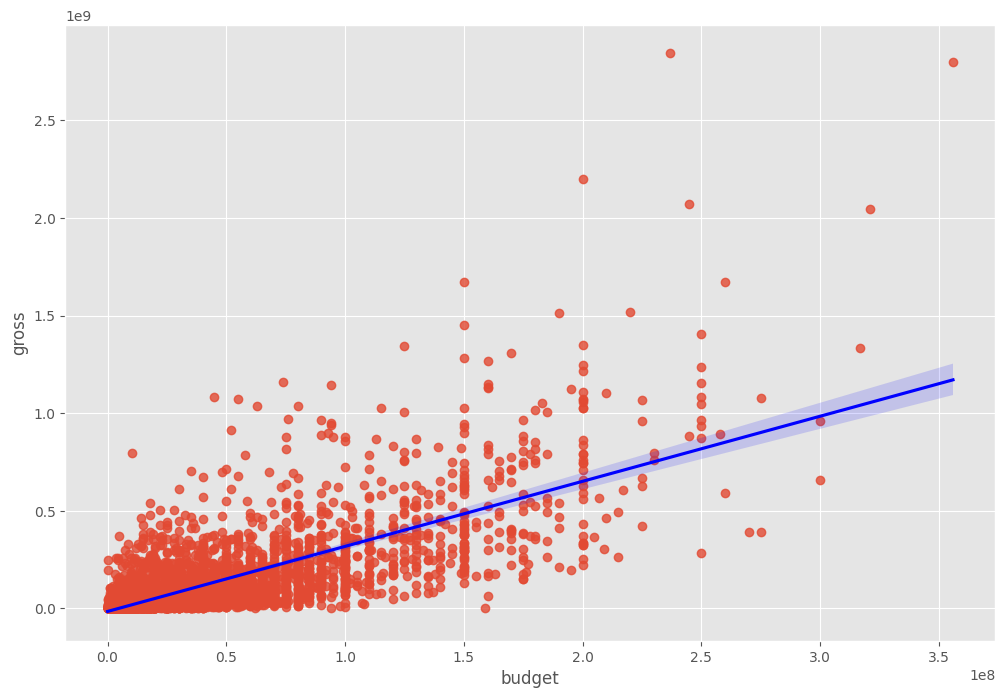

In [ ]:
# Scatter plot with the regression line
sns.regplot(x = 'budget', y = 'gross', data = ols_data, line_kws={"color": "blue"})

# Conclusion
In this project, we explored the relationship between a movie’s budget and its gross revenue using correlation analysis and a simple linear regression model. Our correlation analysis found a moderate positive correlation between the two variables, which was further supported by the regression results.

The regression model showed that budget is a statistically significant predictor of gross revenue, with an R-squared value of 0.548. This means that about 54.8% of the variability in gross revenue can be explained by the movie's budget alone. While this confirms a clear link between how much is spent on production and how much is earned, it also suggests that other variables play a substantial role as well.

This simple model serves as a starting point for understanding movie performance. For future analysis, expanding the model to include multiple predictors and exploring non-linear relationships could offer deeper insights into what drives box office success.
